## Join My Telegram Group: https://t.me/+4YObegy8zHwwM2U1

Data link: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification
License(s): CC0-1.0


In [3]:
!unzip /content/apples-or-tomatoes-image-classification.zip

Archive:  /content/apples-or-tomatoes-image-classification.zip
  inflating: test/apples/img_p1_111.jpeg  
  inflating: test/apples/img_p1_121.jpeg  
  inflating: test/apples/img_p1_127.jpeg  
  inflating: test/apples/img_p1_131.jpeg  
  inflating: test/apples/img_p1_133.jpeg  
  inflating: test/apples/img_p1_139.jpeg  
  inflating: test/apples/img_p1_14.jpeg  
  inflating: test/apples/img_p1_143.jpeg  
  inflating: test/apples/img_p1_15.jpeg  
  inflating: test/apples/img_p1_16.jpeg  
  inflating: test/apples/img_p1_29.jpeg  
  inflating: test/apples/img_p1_30.jpeg  
  inflating: test/apples/img_p1_33.jpeg  
  inflating: test/apples/img_p1_34.jpeg  
  inflating: test/apples/img_p1_36.jpeg  
  inflating: test/apples/img_p1_50.jpeg  
  inflating: test/apples/img_p1_52.jpeg  
  inflating: test/apples/img_p1_55.jpeg  
  inflating: test/apples/img_p1_68.jpeg  
  inflating: test/apples/img_p1_7.jpeg  
  inflating: test/apples/img_p1_70.jpeg  
  inflating: test/apples/img_p1_74.jpeg  
  infla

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import BatchNormalization, Dropout

# Data Loader

apple - 0

tomato - 1

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

Found 294 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


# Normalization

In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Lets define our custom architecture

In [16]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 611ms/step - accuracy: 0.5082 - loss: 5.3799 - val_accuracy: 0.5464 - val_loss: 0.9614
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7266 - loss: 3.6192 - val_accuracy: 0.4948 - val_loss: 1.2808
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6944 - loss: 2.9544 - val_accuracy: 0.4433 - val_loss: 3.9753
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7378 - loss: 3.7747 - val_accuracy: 0.6495 - val_loss: 1.3192
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8106 - loss: 1.7445 - val_accuracy: 0.5567 - val_loss: 2.8853
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8200 - loss: 1.5632 - val_accuracy: 0.5567 - val_loss: 8.5453
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8646 - loss: 1.6114 - val_accuracy: 0.5773 - val_loss: 3.0732
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.8718 - loss: 1.2746 - val_accuracy: 0.6392 -

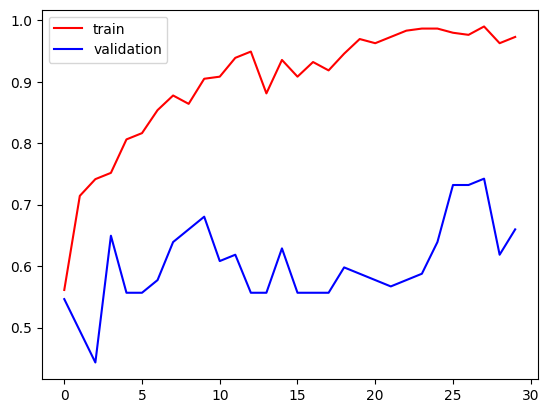

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

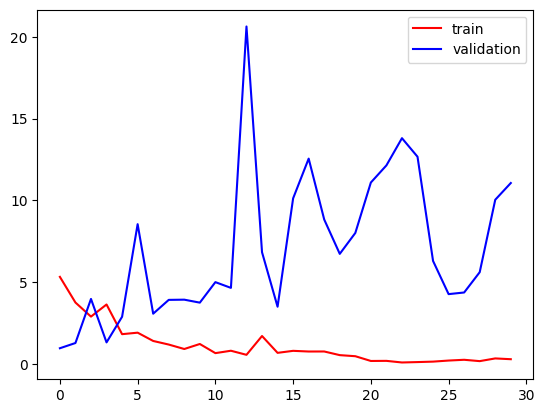

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## ways to reduce overfitting
- Add more data
- Data Augmentation
- Dropout
- Batch Norm
- Reduce complexity

# Inference

array([[[ 86,  70,  88],
        [ 82,  69,  85],
        [ 93,  80,  96],
        ...,
        [ 70,  71,  81],
        [ 78,  79,  89],
        [ 91,  90, 100]],

       [[ 78,  68,  85],
        [ 76,  66,  83],
        [ 85,  78,  93],
        ...,
        [ 67,  68,  78],
        [ 75,  76,  86],
        [ 87,  86,  96]],

       [[ 68,  68,  84],
        [ 67,  67,  83],
        [ 75,  78,  92],
        ...,
        [ 60,  62,  72],
        [ 69,  70,  80],
        [ 81,  80,  90]],

       ...,

       [[ 23, 125, 148],
        [ 21, 123, 145],
        [ 20, 121, 143],
        ...,
        [ 58,  55,  57],
        [ 58,  55,  57],
        [ 46,  42,  47]],

       [[ 24, 124, 148],
        [ 22, 121, 143],
        [ 19, 118, 140],
        ...,
        [ 68,  63,  65],
        [ 51,  46,  48],
        [ 28,  23,  25]],

       [[ 26, 119, 144],
        [ 28, 122, 145],
        [ 25, 115, 139],
        ...,
        [ 49,  42,  47],
        [ 38,  31,  34],
        [ 18,  12,  13]]], dtype=uint8)
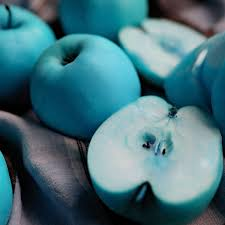

In [50]:
import cv2

test_img = cv2.imread("/content/train/apples/img_p3_56.jpeg")
test_img

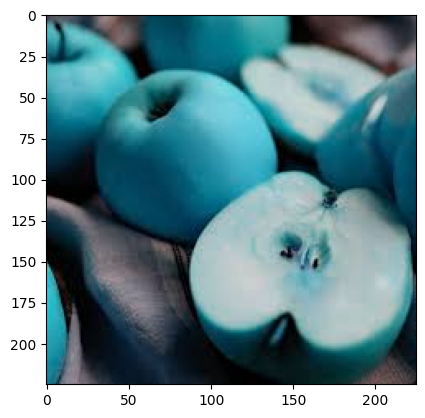

In [51]:
plt.imshow(test_img)

In [52]:
test_img.shape

(225, 225, 3)

In [53]:
test_img = cv2.resize(test_img,(256,256))

In [54]:
test_img.shape

(256, 256, 3)

In [55]:
test_input = test_img.reshape((1,256,256,3))

In [56]:
result = model.predict(test_input)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)

In [57]:
if int(result[0][0]) == 0:
  print("Apple")

else:
  print("Tomato")

Tomato


entbappy73@gmail.com